# Access edge data as numpy arrays
This tutorial shows you how to load built-in datasets


In [1]:
import tgx

### Access TGB datasets
In order to load TGB datasets you should first install the TGB package:

`pip install py-tgb`

Then write name of the dataset in the parantheses:

`tgx.data.tgb("name")`

The dataset names are as follow

`tgbl-wiki`, `tgbl-review`, `tgbl-coin`, `tgbl-comment`, `tgbl-flight`

`tgbn-trade`, `tgbn-genre`, `tgbn-reddit`

In [2]:
dataset = tgx.data.tgb("tgbl-review")
data = tgx.read_edgelist(data=dataset, discretize=True, intervals=50)

file found, skipping download
Dataset directory is  /home/mila/r/razieh.shirzadkhani/.conda/envs/tg/lib/python3.9/site-packages/tgb/datasets/tgbl_review
loading processed file
Number of loaded edges: 4873540
Available timestamps:  6865
Discretizing data to 50 timestamps...
Descritization Done..!


### Access other datasets

To load datasets from https://proceedings.neurips.cc/paper_files/paper/2022/hash/d49042a5d49818711c401d34172f9900-Abstract-Datasets_and_Benchmarks.html you should write the name of the dataset instead of `datasest_name`:

`tgx.data.dataset_name`

The dataset names are as:

`mooc`, `uci`, `uslegis`, `unvote`, `untrade`, `flight`, `wikipedia`, `reddit`, `lastfm`, `contact`, `canparl`, `socialevo`, `enron`

In [3]:
data_path = '/network/scratch/r/razieh.shirzadkhani/'
dataset = tgx.data.mooc(root=data_path)
data = tgx.read_edgelist(data=dataset, discretize=True, intervals=51)

Number of loaded edges: 411749
Available timestamps:  345600
Discretizing data to 51 timestamps...
Descritization Done..!


### Subsampling graphs

To perform subsmpling graphs you should follow these steps:

1. descritize the data

2. create a graph object of data (G)

3. run `graph_subsampling(G)` by specifying either random selection and number of nodes or providing a list of node ids

4. assign the created graph to the object as `G.subsampled_graph`

In [4]:
from tgx.utils.subsampling import graph_subsampling

G = tgx.Graph(data)
new_edges = graph_subsampling(G, random_selection=True, N=1000)
G.subsampled_graph = G._generate_graph(new_edges)

Generate graph subsample...


### Plot node&edge and average degree per timestamp for subsampled graphs

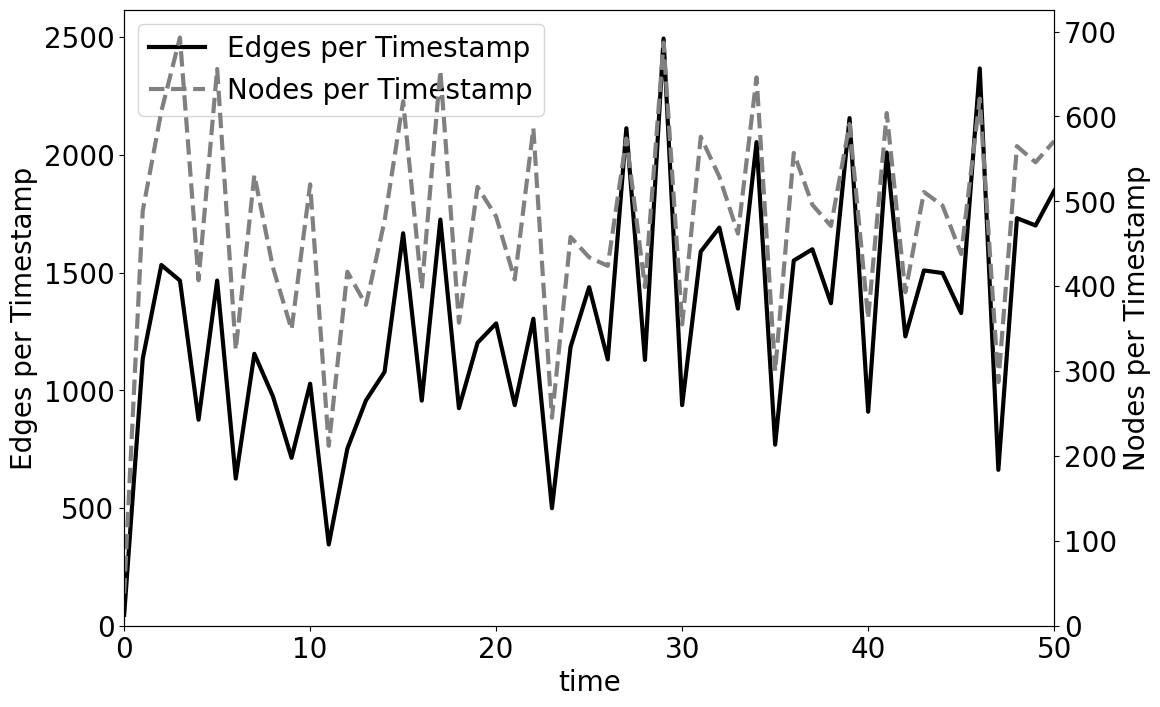

Plotting average degree per timestamp


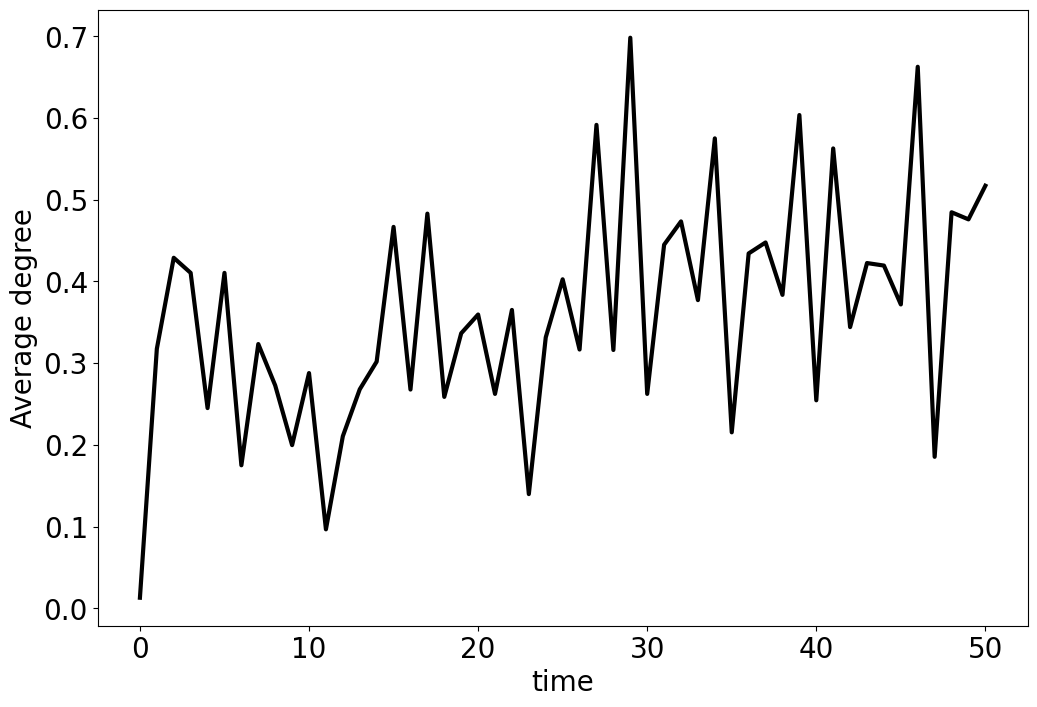

Plotting Done!


In [6]:
plot_path = "./examples/plots/"
tgx.nodes_and_edges_per_ts(G.subsampled_graph, network_name=dataset.name)
total_nodes = G.number_of_nodes()
tgx.average_degree_per_ts(G.subsampled_graph, total_nodes, network_name=dataset.name)